In [1]:
import numpy as np 
import matplotlib.pyplot as plt
from numpy.linalg import eig

In [2]:
pca2 = np.loadtxt('pca2.csv', skiprows=1, delimiter=',').T

pca2_centered = pca2 - np.mean(pca2, axis=1).reshape((-1, 1))
pca2_cov = np.cov(pca2_centered)

pca2_eval, pca2_evec = eig(pca2_cov)

pca2_transformed = pca2_evec.T @ pca2_centered 

In [3]:
pca2_preprocessed = np.delete(pca2, [16, 156], axis=1)

pca2_centered = pca2_preprocessed - np.mean(pca2_preprocessed, axis=1).reshape((-1, 1))
pca2_cov = np.cov(pca2_centered)

pca2_eval_pre, pca2_evec_pre = eig(pca2_cov)

pca2_transformed_preprocessed = pca2_evec_pre.T @ pca2_centered 

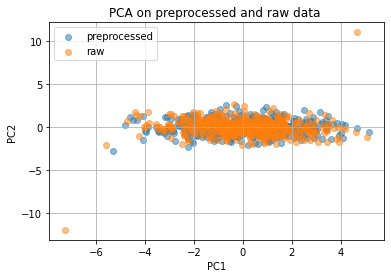

In [8]:

plt.scatter(pca2_transformed_preprocessed[0, :],pca2_transformed_preprocessed[1,:], alpha=0.5, label='preprocessed')
plt.scatter(pca2_transformed[0, :],pca2_transformed[1,:], alpha=0.5, label='raw')
plt.title('PCA on preprocessed and raw data ')
plt.xlabel('PC1')
plt.ylabel('PC2')
plt.legend()
plt.grid()
#origin = np.array([[0, 0],[0, 0]]) # origin point
#plt.quiver(*origin, pca2_evec[:,0], pca2_evec[:,1], color=['r','maroon'], scale=5)
#plt.quiver(*origin, pca2_evec_pre[:,0], pca2_evec_pre[:,1], color=['blue','navy'], scale=5)
plt.show()

Discussion:

The 'outliers' significantly change the direction of the principal components because PCA tries to capture variance as much as possible. 